# Traitement des données issues de simulations LBM

---------------------------------------------------
Ce notebook rend compte du traitement numérique des données issues de structures non calendrées, afin de caractériser l'ensemble des pores de l'électrode grâce au comportement de la saturation. L'ensemble des données est issu de simulations $\textit{LBM}$ pré-traité sous Python.

------------------------------------------------------------
<br>
L'étude nécessite d'obtenir les caractéristiques des pores afin de pouvoir les comparer. Cette comparaison s'effectue sur l'ensemble de points clés de la courbes de saturation comme par exemple le temps de départ de remplissage du pores, et le temps final à partir duquel le pore ne se remplit plus.

##### Ressources Python

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import pickle
import os

warnings.filterwarnings("ignore")

##### Chargement des données nécessaires

Chaque simulation contient un nombre exhaustif de pores, dont chacun est caractérisé par une courbe de saturation. Pour chacune d'entre elle on récupère :
- le temps de départ de remplissage $t_0$.
- le temps de fin de remplissage $t_1$.
- la vélocité du fluide pendant son remplissage $V_0$.
- des caractéristiques propres aux données précédentes.

In [24]:
x = pd.DataFrame(columns=['Pressure','Pixels', 'NFace', 'NFace_c', 'Ratio', 'Centre'])
for path in os.listdir('./données/'):
    for file in os.listdir('./données/'+path+"/"):
        
        if 'velocity_per_pore' in file:
            
            with open('./données/'+path+"/"+file, 'rb') as f:
                data = pickle.load(f)
                
            for col in range(data.shape[0]):
                
                x.loc[len(x)] = [float(path.split("press")[1])] + data[["npx", "nface", "nface_c",
                                                      "ratio", "centre"]].iloc[col, :].tolist()

In [4]:
Informations = []
for path in os.listdir('./données/'):
    for file in os.listdir('./données/'+path+"/"):
        
        if 'saturation' in file:
                    
            with open('./données/'+path+"/"+file, 'rb') as f:
                saturation = pickle.load(f).iloc[:,1:]
                
            for col in range(saturation.shape[1]):
                
                t0=next((i for i,
                         x in enumerate(saturation.iloc[:,col]) if abs(x-saturation.iloc[0,col]) >= 0.1),
                        None)
                t1=next((i for i, 
                         x in enumerate(saturation.iloc[:,col]) if abs(x-saturation.iloc[-1,col]) <= 0.05),None)
                if saturation.iloc[-1,col] >= 0.99:
                    out=1
                else:
                    out=0
                    
                try:
                
                    Informations.append([t0, t1, out, saturation.iloc[-1,col],
                                     (saturation.iloc[t1,col] - saturation.iloc[t0,col]) / (t1-t0)])
                except:
                    
                    Informations.append([t0, t1, out, saturation.iloc[-1,col], "Error"])
                    
Informations = pd.DataFrame(Informations)

Au total , 7535 pores sont étudiés, et constituent les valeurs de la bases de données.

##### Analyse qualitative des données

La distribution empirique permet de montrer le caractère hétérosédastique des variables.

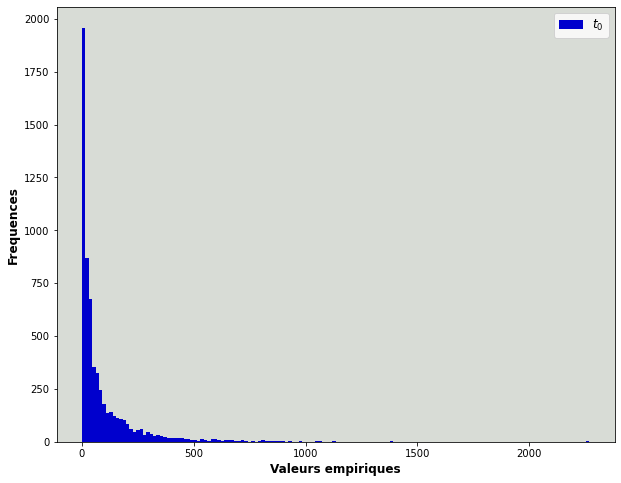

In [20]:
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')
_= plt.hist(Informations.iloc[:, 0], bins=150, color="mediumblue", label="$t_0$")
plt.xlabel('Valeurs empiriques', fontsize=12, fontweight="bold")
plt.ylabel('Frequences', fontsize=12, fontweight="bold")
plt.legend(loc="upper right", fontsize=12)
plt.show()

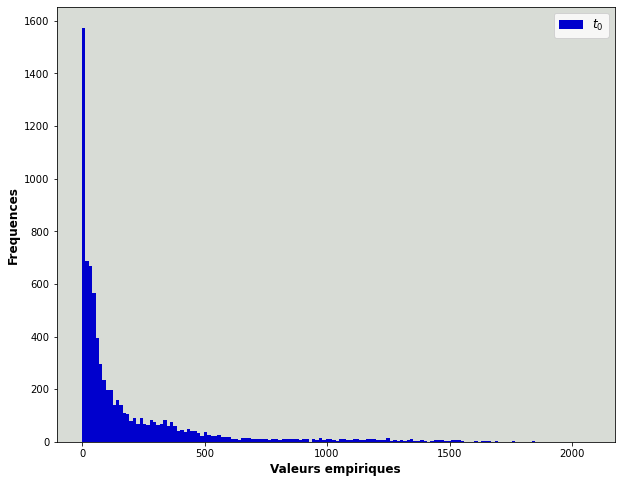

In [21]:
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')
_= plt.hist(Informations.iloc[:, 1], bins=150, color="mediumblue", label="$t_0$")
plt.xlabel('Valeurs empiriques', fontsize=12, fontweight="bold")
plt.ylabel('Frequences', fontsize=12, fontweight="bold")
plt.legend(loc="upper right", fontsize=12)
plt.show()

##### Sauvegarde des données

In [27]:
with open('./données/X.pkl', 'wb') as f:
    pickle.dump(x, f)
with open('./données/Y.pkl', 'wb') as f:
    pickle.dump(Informations, f)